In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import warnings

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [4]:
educ_df_path = "C:/Users/Usuario/Documents/Portfólio/Sistema Educacional Brasileiro/data/sqlData/secondStep/indices_by_year.csv"
region_dict_path = "C:/Users/Usuario/Documents/Portfólio/Sistema Educacional Brasileiro/data/sqlData/secondStep/region_dict.csv"

In [5]:
educ_df = pd.read_csv(educ_df_path)
region_dict = pd.read_csv(region_dict_path)

educ_df = pd.merge(region_dict, educ_df)
educ_df

,region_id,name,adm_id,Adeq Elem,Adeq Fund,Adeq Médio,Esforço Fund,Esforço Médio,Estudantes/Turma Elem,Estudantes/Turma Fund,Estudantes/Turma Médio,DistIdadeSerie Fund,DistIdadeSerie Médio,PercentHigherEduc Elem,PercentHigherEduc Fund,PercentHigherEduc Médio,HorasAula/Dia Elem,HorasAula/Dia Fund,HorasAula/Dia Médio,RegularidadeDocente,INSE,Remuneraçao,CargaHorariaSemanal,IDEB Fund,Aprov Fund,Rep Fund,Aban Fund,Aprov Médio,Rep Médio,Aban Médio,year
0,1,Brasil,1,2.654,2.312,1.930,2.879,3.823,16.3,23.0,30.4,18.1,28.2,67.8,82.1,93.8,NaN,NaN,NaN,2.446,NaN,NaN,NaN,NaN,91.0,7.4,1.6,83.1,10.8,6.1,2017
1,1,Brasil,5,3.164,2.593,1.977,2.886,3.708,13.0,19.9,27.8,5.1,7.4,53.2,74.0,90.3,6.2,4.6,5.5,2.612,NaN,NaN,NaN,NaN,97.7,2.1,0.2,95.7,4.0,0.3,2017
2,1,Brasil,6,2.412,2.237,1.925,2.924,3.896,18.1,23.7,30.8,20.7,31.1,73.9,84.1,94.7,6.0,4.6,4.9,2.407,NaN,NaN,NaN,NaN,89.6,8.4,2.0,81.4,11.8,6.8,2017
3,1,Brasil,1,2.575,2.229,1.910,2.889,3.809,16.3,23.1,30.2,17.2,28.2,70.0,83.9,94.3,NaN,NaN,NaN,2.453,NaN,NaN,NaN,NaN,91.5,7.0,1.5,83.4,10.5,6.1,2018
4,1,Brasil,5,3.081,2.532,1.957,2.868,3.694,13.0,19.8,27.2,4.9,7.4,55.4,75.1,90.4,6.2,4.6,5.5,2.646,NaN,NaN,NaN,NaN,98.0,1.9,0.1,96.0,3.7,0.3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,33,Tocantins,5,2.465,2.081,1.895,2.949,3.493,14.0,18.9,26.2,3.4,9.8,80.2,86.5,93.4,4.6,4.7,5.5,2.734,NaN,NaN,NaN,NaN,98.7,1.2,0.1,96.7,2.9,0.4,2022
1013,33,Tocantins,6,2.167,2.124,2.022,2.661,3.507,18.9,21.7,24.1,12.0,23.4,77.7,89.6,96.9,5.4,5.5,5.4,2.845,NaN,NaN,NaN,NaN,95.5,3.8,0.7,91.8,4.4,3.8,2022
1014,33,Tocantins,1,2.158,2.069,1.906,2.713,3.541,18.6,21.7,24.4,9.8,20.3,79.5,90.5,96.8,5.3,5.7,5.5,2.845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1015,33,Tocantins,5,2.465,2.071,1.976,2.970,3.577,14.1,19.0,26.3,3.2,8.0,77.6,86.7,92.9,4.8,4.7,5.7,2.734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


#### 1. Is Education in Brazil evolving through Years ? ####

In [6]:
educ_df['Aprov Média'] = (educ_df['Aprov Fund'] + educ_df['Aprov Médio']) / 2
educ_df['Rep Média'] = (educ_df['Rep Fund'] + educ_df['Rep Médio']) / 2
educ_df['Aban Média'] = (educ_df['Aban Fund'] + educ_df['Aban Médio']) / 2

### 1.1. Education considering Total administration (Public and Private) ###

#### How is the perfomance rates evolving through time ? ####

In [7]:
def plotRepAban(df, title):
    plt.figure(figsize=(10, 6))  # Optional: Increase figure size for better visibility

    # Plotting 'Taxa de Reprovação'
    plt.plot(df['year'], df['Rep Média'], label='Taxa de Reprovação', marker='o')  # Added marker
    for x, y in zip(df['year'], df['Rep Média']):
        plt.text(x, y + 0.6, f'{y:.2f}', ha='center')  # Adjust 0.5 offset as needed

    # Plotting 'Taxa de Abandono'
    plt.plot(df['year'], df['Aban Média'], label='Taxa de Abandono', marker='o')  # Added marker
    for x, y in zip(df['year'], df['Aban Média']):
        plt.text(x, y + 0.5, f'{y:.2f}', ha='center')  # Adjust 0.5 offset as needed

    plt.legend()
    plt.title(title)
    plt.xlabel('Year')  # Label for the x-axis
    plt.ylabel('Taxa (%)')  # Label for the y-axis
    plt.grid(True)  # Optional: Adds a grid for better readability
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


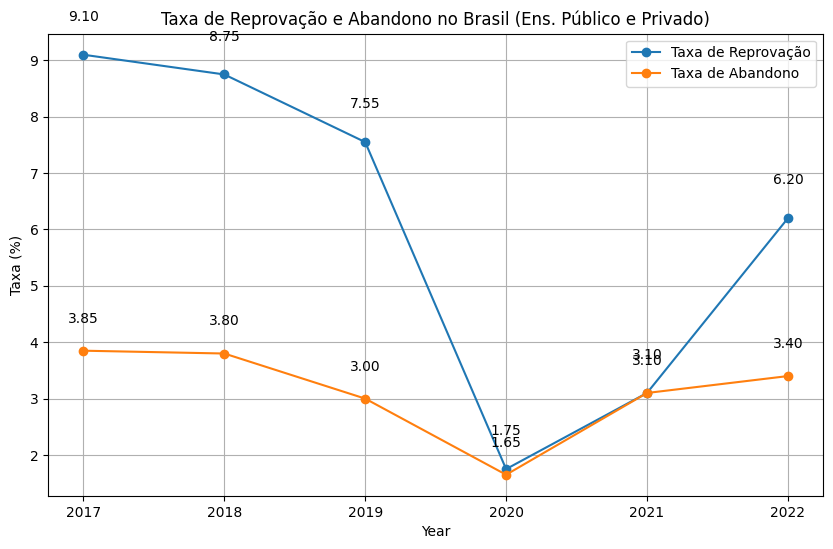

In [8]:
title = "Taxa de Reprovação e Abandono no Brasil (Ens. Público e Privado)"
plotRepAban(educ_df[(educ_df['adm_id'] == 1) & (educ_df['region_id'] == 1)], title)

* De 2017 a 2020, o Brasil reduziu em 57% a taxa de abandono e em 80% a taxa de reprovação. Porém, nos anos de pandemia (entre 2020 e 2022), obteve um aumento de 106% na taxa de abandono e de 254% na taxa de reprovação. A pandemia foi catastrófica para a educação brasileira.

* De qualquer forma, de 2017 a 2022, o Brasil obteve uma diminuição de 10% na taxa de abandono e de 32%  a taxa de reprovação.

#### 1.2. Education considering only Private Education ####

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


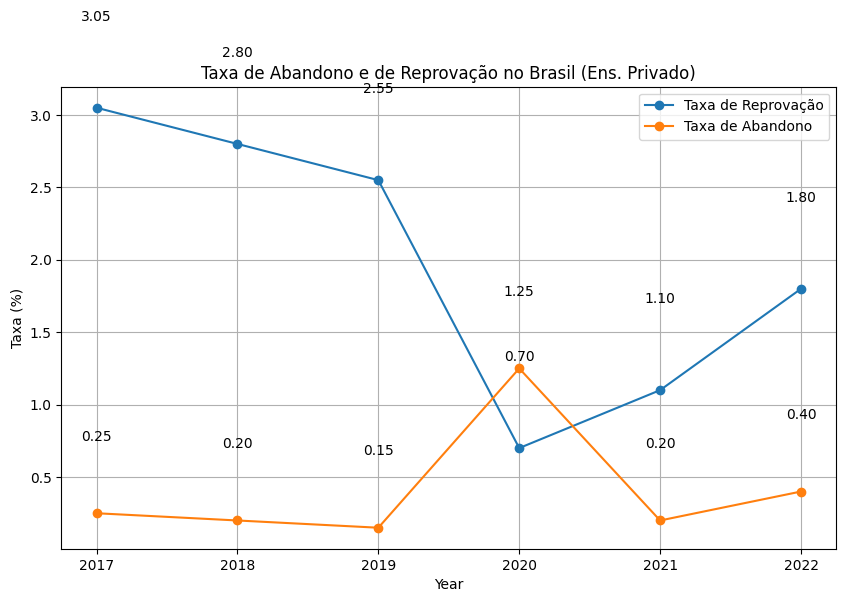

In [9]:
title = "Taxa de Abandono e de Reprovação no Brasil (Ens. Privado)"
educ_df_private = educ_df[(educ_df['adm_id'] == 5) & (educ_df['region_id'] == 1)]

plotRepAban(educ_df_private, title)

### 1.3. Education Considering Public Education only ###

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


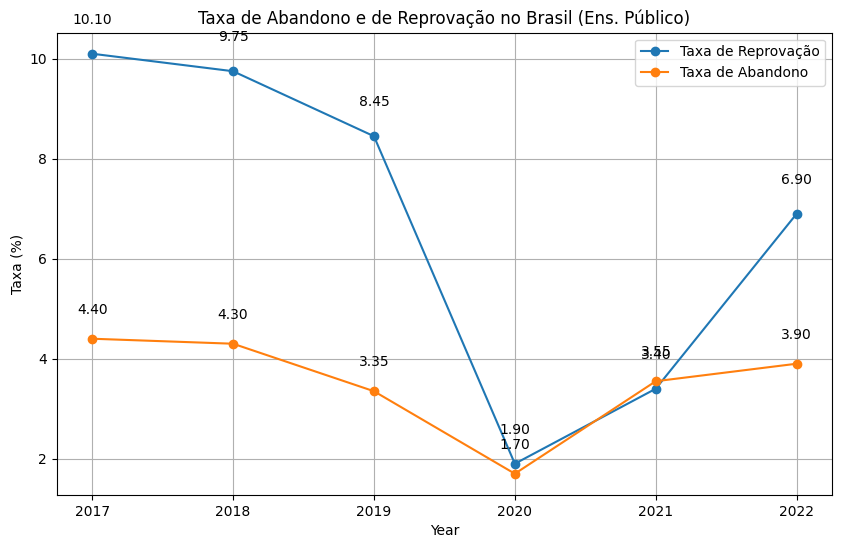

In [10]:
title = "Taxa de Abandono e de Reprovação no Brasil (Ens. Público)"
educ_df_public = educ_df[(educ_df['adm_id'] == 6) & (educ_df['region_id'] == 1)]

plotRepAban(educ_df_public, title)

### 1.1.4. Comparando Taxas entre os Tipos Administrativos ###

In [11]:
def comparePublicPrivate(column, title):
    plt.figure(figsize=(10, 6))  # Optional: Increase figure size for better visibility
    
    # Plotting public education
    plt.plot(educ_df_public['year'], educ_df_public[column], label='Ensino Público', marker='o')  # Added marker
    for x, y in zip(educ_df_public['year'], educ_df_public[column]):
        plt.text(x, y + 0.6, f'{y:.2f}', ha='center')  # Adjust 0.5 offset as needed

    # Plotting private education
    plt.plot(educ_df_private['year'], educ_df_private[column], label='Ensino Privado', marker='o')  # Added marker
    for x, y in zip(educ_df_private['year'], educ_df_private[column]):
        plt.text(x, y + 0.5, f'{y:.2f}', ha='center')  # Adjust 0.5 offset as needed

    plt.legend()
    plt.title(title)
    plt.xlabel('Year')  # Label for the x-axis
    plt.ylabel('Taxa (%)')  # Label for the y-axis
    plt.grid(True)  # Optional: Adds a grid for better readability
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


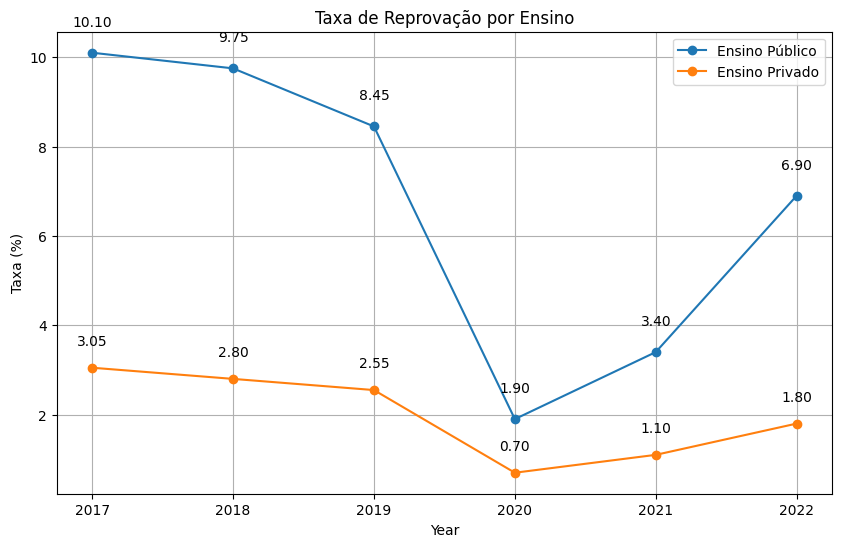

In [12]:
title = "Taxa de Reprovação por Ensino"
comparePublicPrivate('Rep Média', title)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


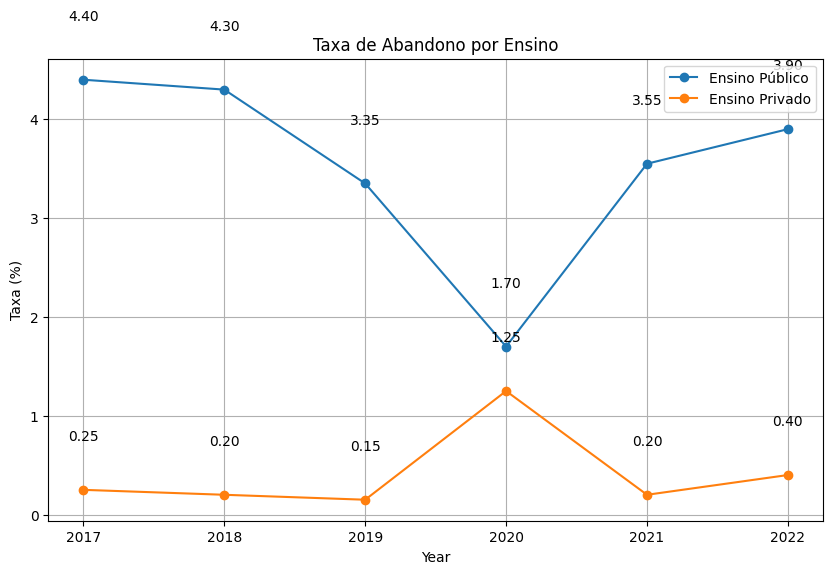

In [13]:
title = "Taxa de Abandono por Ensino"
comparePublicPrivate('Aban Média', title)

In [14]:
rep_public = educ_df_public['Rep Média'].mean()
rep_private = educ_df_private['Rep Média'].mean()
print(f"Média da taxa de reprovação do Ensino Público : {rep_public}%")
print(f"Média da taxa de reprovação do Ensino Privado : {rep_private}%")
print(f"A taxa de reprovação do ensino público é cerca de {rep_public / rep_private} maior do que a do ensino privado ")

Média da taxa de reprovação do Ensino Público : 6.75%
Média da taxa de reprovação do Ensino Privado : 1.9999999999999993%
A taxa de reprovação do ensino público é cerca de 3.3750000000000013 maior do que a do ensino privado 


In [15]:
Aban_public = educ_df_public['Aban Média'].mean()
Aban_private = educ_df_private['Aban Média'].mean()
print(f"Média da taxa de Abandono do Ensino Público : {Aban_public}%")
print(f"Média da taxa de Abandono do Ensino Privado : {Aban_private}%")
print(f"A taxa de Abandono do ensino público é cerca de {Aban_public / Aban_private} maior do que a do ensino privado")

Média da taxa de Abandono do Ensino Público : 3.533333333333333%
Média da taxa de Abandono do Ensino Privado : 0.4083333333333334%
A taxa de Abandono do ensino público é cerca de 8.653061224489795 maior do que a do ensino privado


#### 2. Indicador IDEB ####

In [16]:
educ_df_mean = educ_df.groupby(by=['region_id', 'adm_id', 'name'], as_index=False).mean()
educ_df_mean

,region_id,adm_id,name,Adeq Elem,Adeq Fund,Adeq Médio,Esforço Fund,Esforço Médio,Estudantes/Turma Elem,Estudantes/Turma Fund,Estudantes/Turma Médio,DistIdadeSerie Fund,DistIdadeSerie Médio,PercentHigherEduc Elem,PercentHigherEduc Fund,PercentHigherEduc Médio,HorasAula/Dia Elem,HorasAula/Dia Fund,HorasAula/Dia Médio,RegularidadeDocente,INSE,Remuneraçao,CargaHorariaSemanal,IDEB Fund,Aprov Fund,Rep Fund,Aban Fund,Aprov Médio,Rep Médio,Aban Médio,year,Aprov Média,Rep Média,Aban Média
0,1,1,Brasil,2.298143,2.030286,1.797857,2.873286,3.767571,15.900000,22.885714,29.828571,14.957143,25.114286,76.671429,87.885714,96.028571,NaN,NaN,NaN,2.571571,NaN,NaN,NaN,NaN,94.083333,4.650000,1.266667,87.500000,7.500000,5.000000,2020.0,90.791667,6.075,3.133333
1,1,5,Brasil,2.738429,2.272857,1.813143,2.861429,3.675143,12.385714,19.271429,27.157143,4.700000,6.700000,64.914286,80.885714,93.700000,6.400000,4.671429,5.600000,2.743571,NaN,NaN,NaN,NaN,98.133333,1.416667,0.450000,97.050000,2.583333,0.366667,2020.0,97.591667,2.000,0.408333
2,1,6,Brasil,2.099857,1.966143,1.795286,2.923857,3.826429,17.757143,23.785714,30.242857,17.085714,27.685714,81.428571,89.671429,96.628571,5.914286,4.757143,5.285714,2.529571,NaN,NaN,NaN,NaN,93.250000,5.300000,1.450000,86.183333,8.200000,5.616667,2020.0,89.716667,6.750,3.533333
3,2,1,Norte,2.277143,2.250571,1.800429,2.784857,3.848714,17.857143,22.442857,28.942857,22.571429,37.342857,74.657143,83.657143,96.828571,4.557143,4.471429,4.842857,2.459714,NaN,NaN,NaN,5.063280,91.300000,6.316667,2.383333,83.883333,7.883333,8.233333,2020.0,87.591667,7.100,5.308333
4,2,5,Norte,2.629143,2.084000,1.733000,2.860571,3.782714,13.700000,19.328571,29.785714,4.871429,8.300000,71.957143,84.442857,94.542857,4.500000,4.528571,5.600000,2.636000,NaN,NaN,NaN,6.406277,98.183333,1.166667,0.650000,97.050000,2.383333,0.566667,2020.0,97.616667,1.775,0.608333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,32,5,São Paulo,2.291364,1.793636,1.743000,2.938364,3.643545,11.381818,19.927273,25.936364,2.363636,4.227273,77.736364,92.127273,96.572727,7.681818,5.027273,5.681818,2.631091,6.270,3790.860571,30.835101,7.033483,98.630000,1.370000,0.000000,97.330000,2.620000,0.050000,2018.0,97.980000,1.995,0.025000
95,32,6,São Paulo,1.849545,1.564273,1.743000,3.051182,3.931091,19.336364,27.336364,32.781818,7.754545,14.363636,88.863636,95.127273,96.736364,6.709091,5.245455,5.281818,2.431000,5.255,4417.163143,32.457120,5.756861,96.400000,2.870000,0.730000,88.300000,8.010000,3.690000,2018.0,92.350000,5.440,2.210000
96,33,1,Tocantins,2.580909,2.311636,2.120364,2.755182,3.729364,18.463636,22.218182,25.718182,16.245455,27.954545,69.027273,85.200000,95.772727,5.281818,4.881818,5.063636,2.632273,4.755,NaN,NaN,5.202514,92.530000,6.290000,1.180000,85.850000,8.680000,5.470000,2018.0,89.190000,7.485,3.325000
97,33,5,Tocantins,2.914727,2.465909,2.168455,2.936545,3.547000,14.227273,19.000000,27.027273,3.736364,7.745455,66.745455,79.363636,90.127273,4.718182,4.581818,5.490909,2.558182,5.995,3101.051143,29.884153,6.768104,98.050000,1.800000,0.150000,94.720000,4.910000,0.370000,2018.0,96.385000,3.355,0.260000


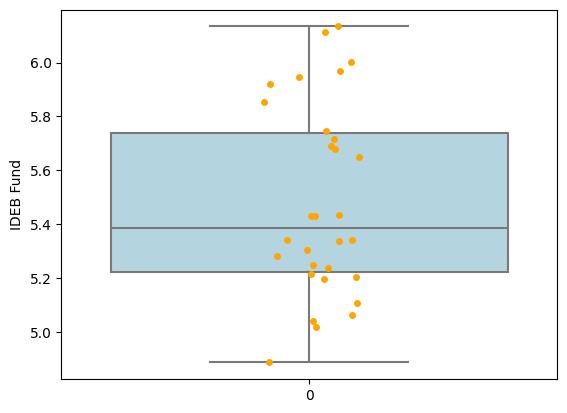

In [17]:
sns.stripplot(educ_df_mean[educ_df_mean['adm_id'] == 1]['IDEB Fund'], color='orange')
sns.boxplot(educ_df_mean[educ_df_mean['adm_id'] == 1]['IDEB Fund'], color='lightblue')
plt.show()

#### 2.1. Melhores 5 Idebs ####

In [18]:
total_educ_df = educ_df[educ_df["adm_id"] == 1]
melhores_IDEB = total_educ_df[total_educ_df["IDEB Fund"] >= 5.93]

#### 2.2. Piores 5 Idebs ###

In [19]:
piores_IDEB = total_educ_df[total_educ_df['IDEB Fund'] < 5.15]
piores_IDEB

,region_id,name,adm_id,Adeq Elem,Adeq Fund,Adeq Médio,Esforço Fund,Esforço Médio,Estudantes/Turma Elem,Estudantes/Turma Fund,Estudantes/Turma Médio,DistIdadeSerie Fund,DistIdadeSerie Médio,PercentHigherEduc Elem,PercentHigherEduc Fund,PercentHigherEduc Médio,HorasAula/Dia Elem,HorasAula/Dia Fund,HorasAula/Dia Médio,RegularidadeDocente,INSE,Remuneraçao,CargaHorariaSemanal,IDEB Fund,Aprov Fund,Rep Fund,Aban Fund,Aprov Médio,Rep Médio,Aban Médio,year,Aprov Média,Rep Média,Aban Média
33,2,Norte,1,2.076,2.129,1.801,2.805,3.854,17.2,22.5,30.3,20.9,38.0,80.1,87.1,97.4,4.5,4.4,4.8,2.530,NaN,NaN,NaN,5.063280,94.5,3.0,2.5,81.9,8.0,10.1,2021,88.20,5.50,6.30
216,9,Amapá,1,2.410,2.079,1.346,2.295,3.273,16.0,21.2,29.3,24.0,38.2,74.3,86.0,98.3,4.2,4.4,5.7,2.543,4.76,NaN,NaN,5.019795,89.8,8.1,2.1,77.1,15.4,7.5,2021,83.45,11.75,4.80
447,16,Maranhão,1,2.995,2.962,2.000,2.465,3.687,16.1,21.2,33.9,18.3,27.2,55.5,70.1,94.4,4.3,4.4,5.2,2.587,4.34,NaN,NaN,4.886271,95.5,2.0,2.5,89.1,4.5,6.4,2021,92.30,3.25,4.45
645,22,Pará,1,2.026,2.036,1.534,2.973,4.257,17.1,22.7,33.7,25.0,44.7,81.3,89.2,99.0,4.5,4.4,4.6,2.635,4.39,NaN,NaN,5.038784,93.1,3.8,3.1,73.3,11.1,15.6,2021,83.20,7.45,9.35
942,31,Sergipe,1,2.278,1.813,1.450,2.803,3.943,16.0,22.3,33.8,22.7,38.3,76.5,92.6,99.3,4.9,4.5,5.8,2.891,4.59,NaN,NaN,5.108251,97.7,0.9,1.4,94.8,2.1,3.1,2021,96.25,1.50,2.25


### 2.3. Comparando os piores e melhores IDEB's ###

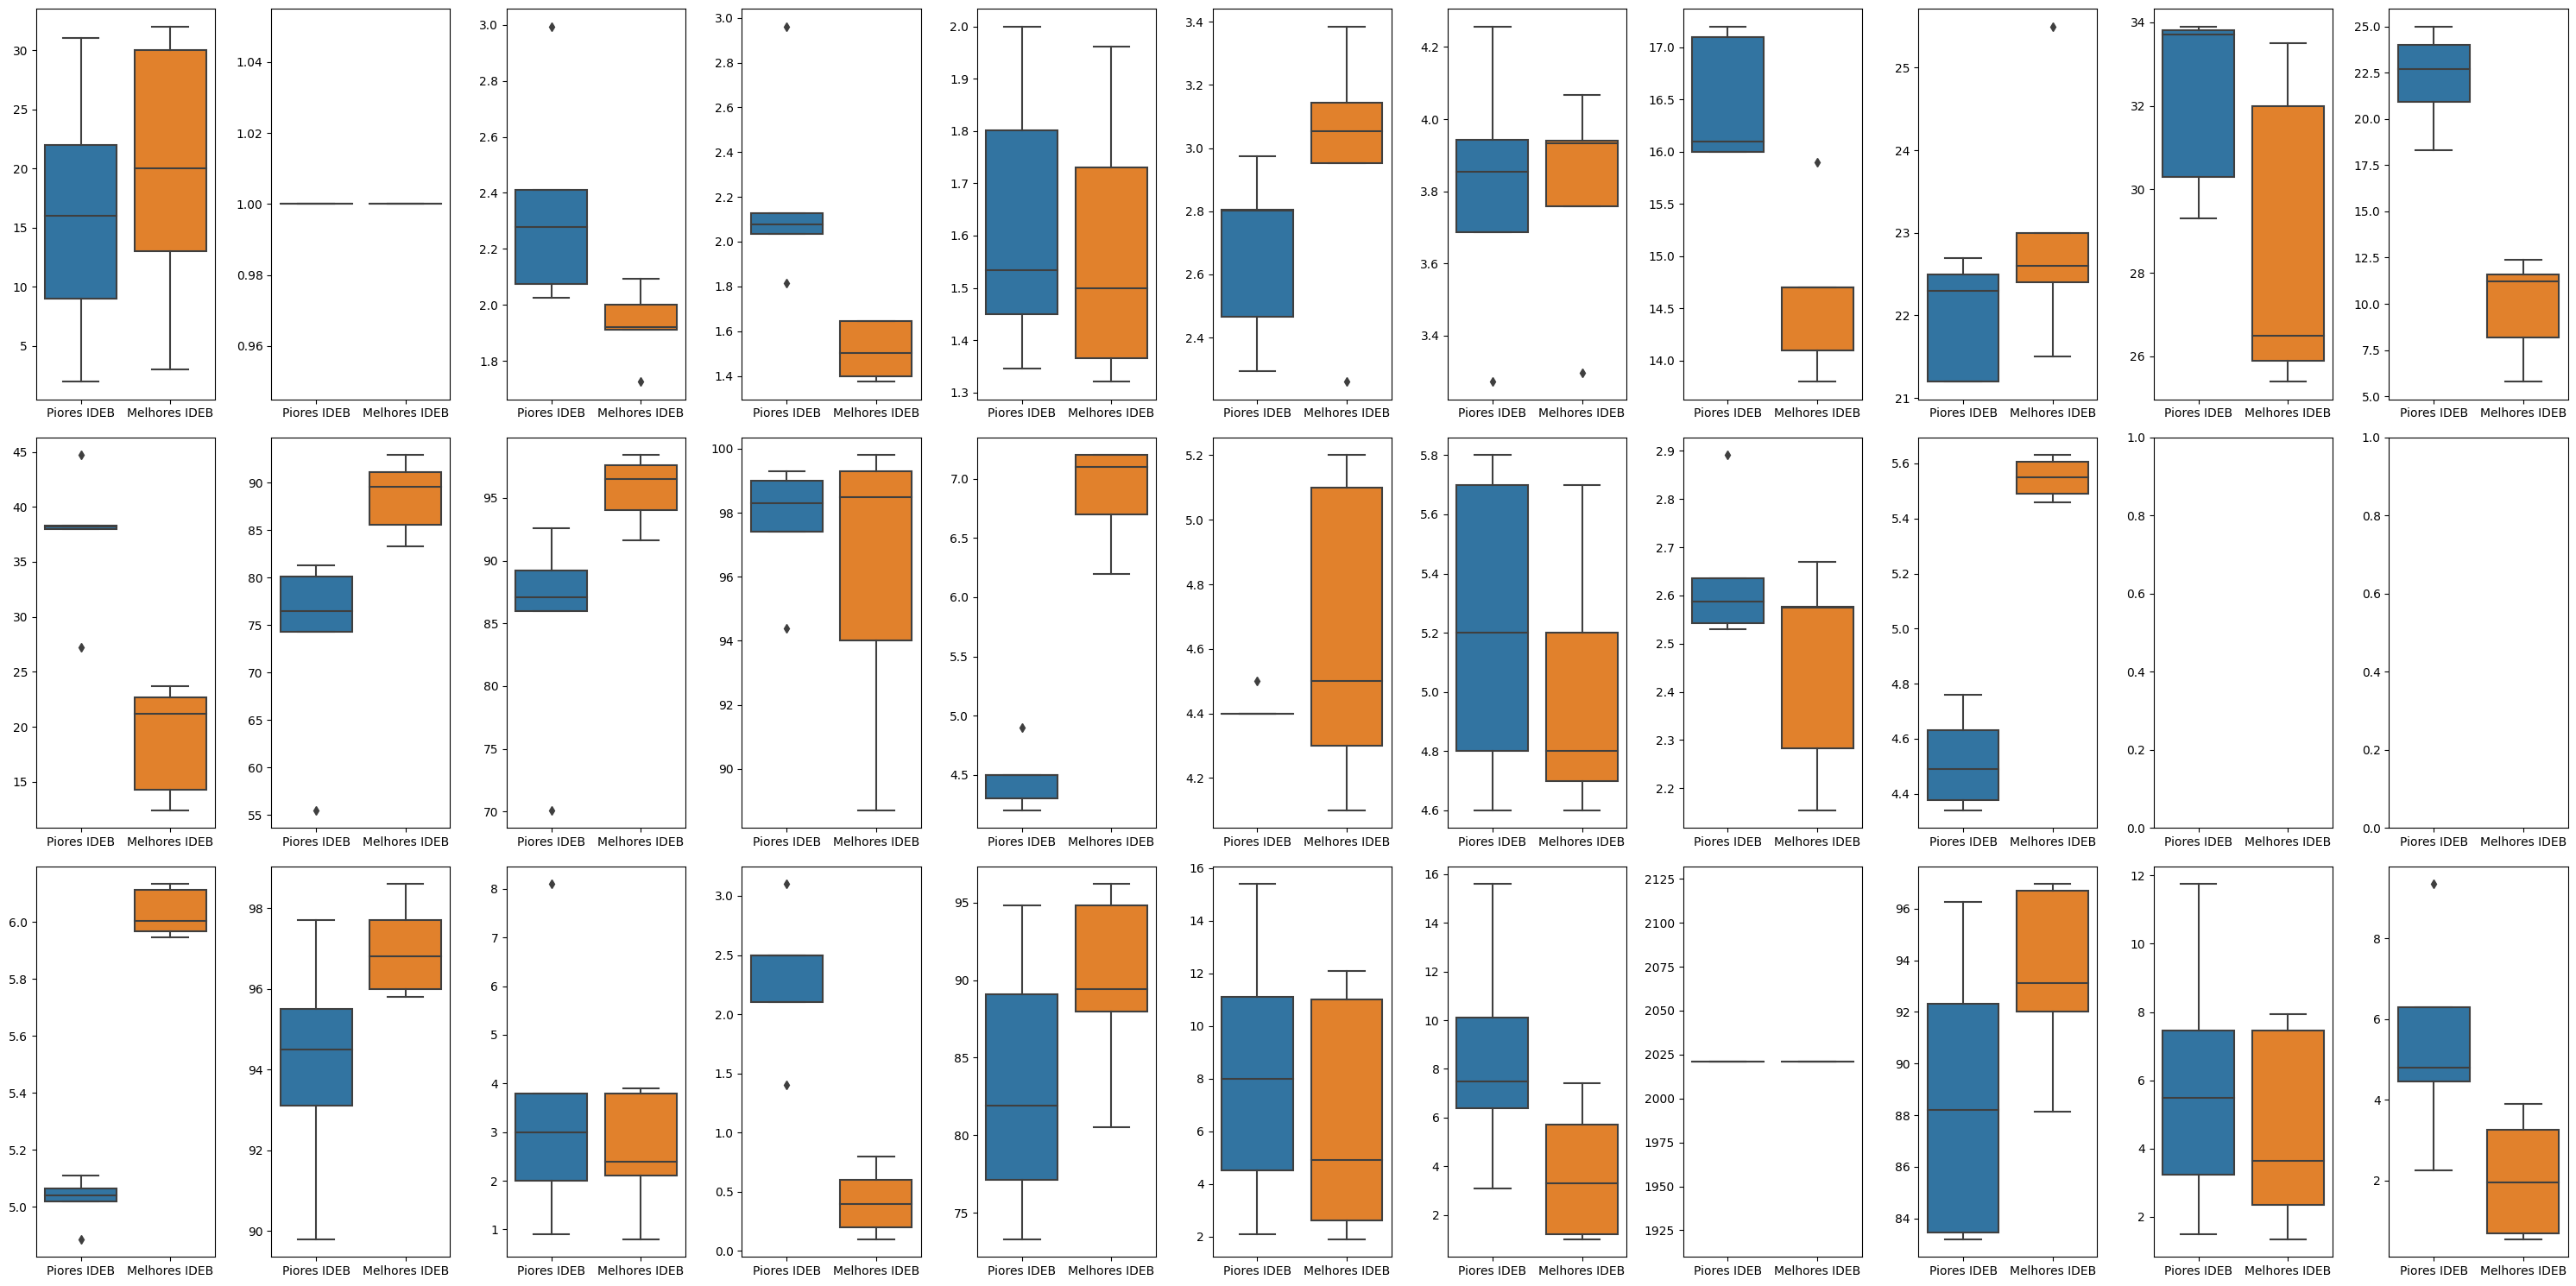

In [20]:
# Número de variáveis (colunas)
num_vars = len(piores_IDEB.select_dtypes("number").columns)

# Criando uma única figura com vários subplots
plt.figure(figsize=(30, 15))  

for i, column in enumerate(piores_IDEB.select_dtypes("number").columns, 1):
    plt.subplot(3, int(num_vars/3), i)  # 1 linha, num_vars colunas, índice i
    sns.boxplot(data=pd.DataFrame({
        'Piores IDEB': piores_IDEB[column],
        'Melhores IDEB': melhores_IDEB[column]
    }))
    
plt.tight_layout()  # Ajusta automaticamente os subplots
plt.show()


* O que chama a atenção: o nivel socioeconômicos dos alunos dos melhores IDEB's é bem maior quando comparado com os piores IDEB's. As regiões de maior IDEB estão situadas em um nível socioeconômico entre 5.3 e 5.65, aproximadamente. Já os piores IDEB estão situados entre 4.3 e 4.7.

### 3. Análise por Região ###

In [21]:
regions = ['Brasil', 'Norte', 'Sul', 'Centro-oeste', 'Sudeste', 'Nordeste']
educ_regions_df = educ_df[educ_df['name'].isin(regions)]

In [22]:
educ_regions_df

,region_id,name,adm_id,Adeq Elem,Adeq Fund,Adeq Médio,Esforço Fund,Esforço Médio,Estudantes/Turma Elem,Estudantes/Turma Fund,Estudantes/Turma Médio,DistIdadeSerie Fund,DistIdadeSerie Médio,PercentHigherEduc Elem,PercentHigherEduc Fund,PercentHigherEduc Médio,HorasAula/Dia Elem,HorasAula/Dia Fund,HorasAula/Dia Médio,RegularidadeDocente,INSE,Remuneraçao,CargaHorariaSemanal,IDEB Fund,Aprov Fund,Rep Fund,Aban Fund,Aprov Médio,Rep Médio,Aban Médio,year,Aprov Média,Rep Média,Aban Média
0,1,Brasil,1,2.654,2.312,1.930,2.879,3.823,16.3,23.0,30.4,18.1,28.2,67.8,82.1,93.8,NaN,NaN,NaN,2.446,NaN,NaN,NaN,NaN,91.0,7.4,1.6,83.1,10.8,6.1,2017,87.05,9.10,3.85
1,1,Brasil,5,3.164,2.593,1.977,2.886,3.708,13.0,19.9,27.8,5.1,7.4,53.2,74.0,90.3,6.2,4.6,5.5,2.612,NaN,NaN,NaN,NaN,97.7,2.1,0.2,95.7,4.0,0.3,2017,96.70,3.05,0.25
2,1,Brasil,6,2.412,2.237,1.925,2.924,3.896,18.1,23.7,30.8,20.7,31.1,73.9,84.1,94.7,6.0,4.6,4.9,2.407,NaN,NaN,NaN,NaN,89.6,8.4,2.0,81.4,11.8,6.8,2017,85.50,10.10,4.40
3,1,Brasil,1,2.575,2.229,1.910,2.889,3.809,16.3,23.1,30.2,17.2,28.2,70.0,83.9,94.3,NaN,NaN,NaN,2.453,NaN,NaN,NaN,NaN,91.5,7.0,1.5,83.4,10.5,6.1,2018,87.45,8.75,3.80
4,1,Brasil,5,3.081,2.532,1.957,2.868,3.694,13.0,19.8,27.2,4.9,7.4,55.4,75.1,90.4,6.2,4.6,5.5,2.646,NaN,NaN,NaN,NaN,98.0,1.9,0.1,96.0,3.7,0.3,2018,97.00,2.80,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,6,Nordeste,5,2.997,2.574,1.878,2.779,3.702,13.4,17.7,27.2,7.8,8.1,55.3,72.6,89.4,4.5,4.5,5.8,2.966,NaN,NaN,NaN,NaN,98.6,1.2,0.2,96.5,2.4,1.1,2022,97.55,1.80,0.65
122,6,Nordeste,6,2.166,2.176,1.828,2.735,3.683,17.6,22.8,32.6,18.4,30.4,74.6,84.8,95.8,5.2,5.2,6.0,2.753,NaN,NaN,NaN,NaN,91.3,6.7,2.0,84.5,8.2,7.3,2022,87.90,7.45,4.65
123,6,Nordeste,1,2.361,2.232,1.837,2.706,3.642,16.4,21.5,31.2,15.5,24.8,71.0,82.9,94.0,5.2,5.2,6.3,2.804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN
124,6,Nordeste,5,2.986,2.557,1.890,2.785,3.697,13.6,17.9,27.8,7.7,7.9,56.3,72.7,89.1,4.6,4.5,5.8,2.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN


### 3.1. Boxplot por Região ###

<Axes: xlabel='name', ylabel='Adeq Elem'>

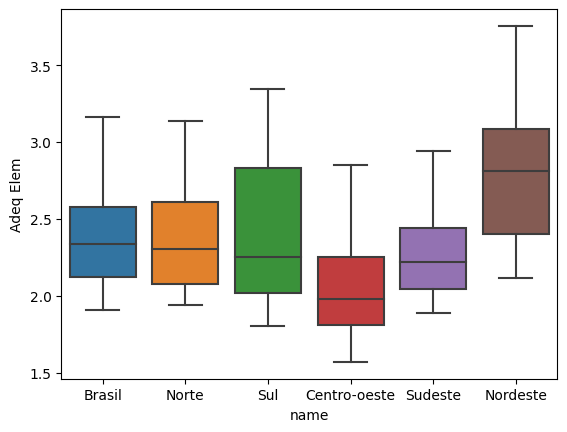

In [23]:
sns.boxplot(data=educ_regions_df, x='name', y='Adeq Elem')

In [24]:
educ_regions_df

,region_id,name,adm_id,Adeq Elem,Adeq Fund,Adeq Médio,Esforço Fund,Esforço Médio,Estudantes/Turma Elem,Estudantes/Turma Fund,Estudantes/Turma Médio,DistIdadeSerie Fund,DistIdadeSerie Médio,PercentHigherEduc Elem,PercentHigherEduc Fund,PercentHigherEduc Médio,HorasAula/Dia Elem,HorasAula/Dia Fund,HorasAula/Dia Médio,RegularidadeDocente,INSE,Remuneraçao,CargaHorariaSemanal,IDEB Fund,Aprov Fund,Rep Fund,Aban Fund,Aprov Médio,Rep Médio,Aban Médio,year,Aprov Média,Rep Média,Aban Média
0,1,Brasil,1,2.654,2.312,1.930,2.879,3.823,16.3,23.0,30.4,18.1,28.2,67.8,82.1,93.8,NaN,NaN,NaN,2.446,NaN,NaN,NaN,NaN,91.0,7.4,1.6,83.1,10.8,6.1,2017,87.05,9.10,3.85
1,1,Brasil,5,3.164,2.593,1.977,2.886,3.708,13.0,19.9,27.8,5.1,7.4,53.2,74.0,90.3,6.2,4.6,5.5,2.612,NaN,NaN,NaN,NaN,97.7,2.1,0.2,95.7,4.0,0.3,2017,96.70,3.05,0.25
2,1,Brasil,6,2.412,2.237,1.925,2.924,3.896,18.1,23.7,30.8,20.7,31.1,73.9,84.1,94.7,6.0,4.6,4.9,2.407,NaN,NaN,NaN,NaN,89.6,8.4,2.0,81.4,11.8,6.8,2017,85.50,10.10,4.40
3,1,Brasil,1,2.575,2.229,1.910,2.889,3.809,16.3,23.1,30.2,17.2,28.2,70.0,83.9,94.3,NaN,NaN,NaN,2.453,NaN,NaN,NaN,NaN,91.5,7.0,1.5,83.4,10.5,6.1,2018,87.45,8.75,3.80
4,1,Brasil,5,3.081,2.532,1.957,2.868,3.694,13.0,19.8,27.2,4.9,7.4,55.4,75.1,90.4,6.2,4.6,5.5,2.646,NaN,NaN,NaN,NaN,98.0,1.9,0.1,96.0,3.7,0.3,2018,97.00,2.80,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,6,Nordeste,5,2.997,2.574,1.878,2.779,3.702,13.4,17.7,27.2,7.8,8.1,55.3,72.6,89.4,4.5,4.5,5.8,2.966,NaN,NaN,NaN,NaN,98.6,1.2,0.2,96.5,2.4,1.1,2022,97.55,1.80,0.65
122,6,Nordeste,6,2.166,2.176,1.828,2.735,3.683,17.6,22.8,32.6,18.4,30.4,74.6,84.8,95.8,5.2,5.2,6.0,2.753,NaN,NaN,NaN,NaN,91.3,6.7,2.0,84.5,8.2,7.3,2022,87.90,7.45,4.65
123,6,Nordeste,1,2.361,2.232,1.837,2.706,3.642,16.4,21.5,31.2,15.5,24.8,71.0,82.9,94.0,5.2,5.2,6.3,2.804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN
124,6,Nordeste,5,2.986,2.557,1.890,2.785,3.697,13.6,17.9,27.8,7.7,7.9,56.3,72.7,89.1,4.6,4.5,5.8,2.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN


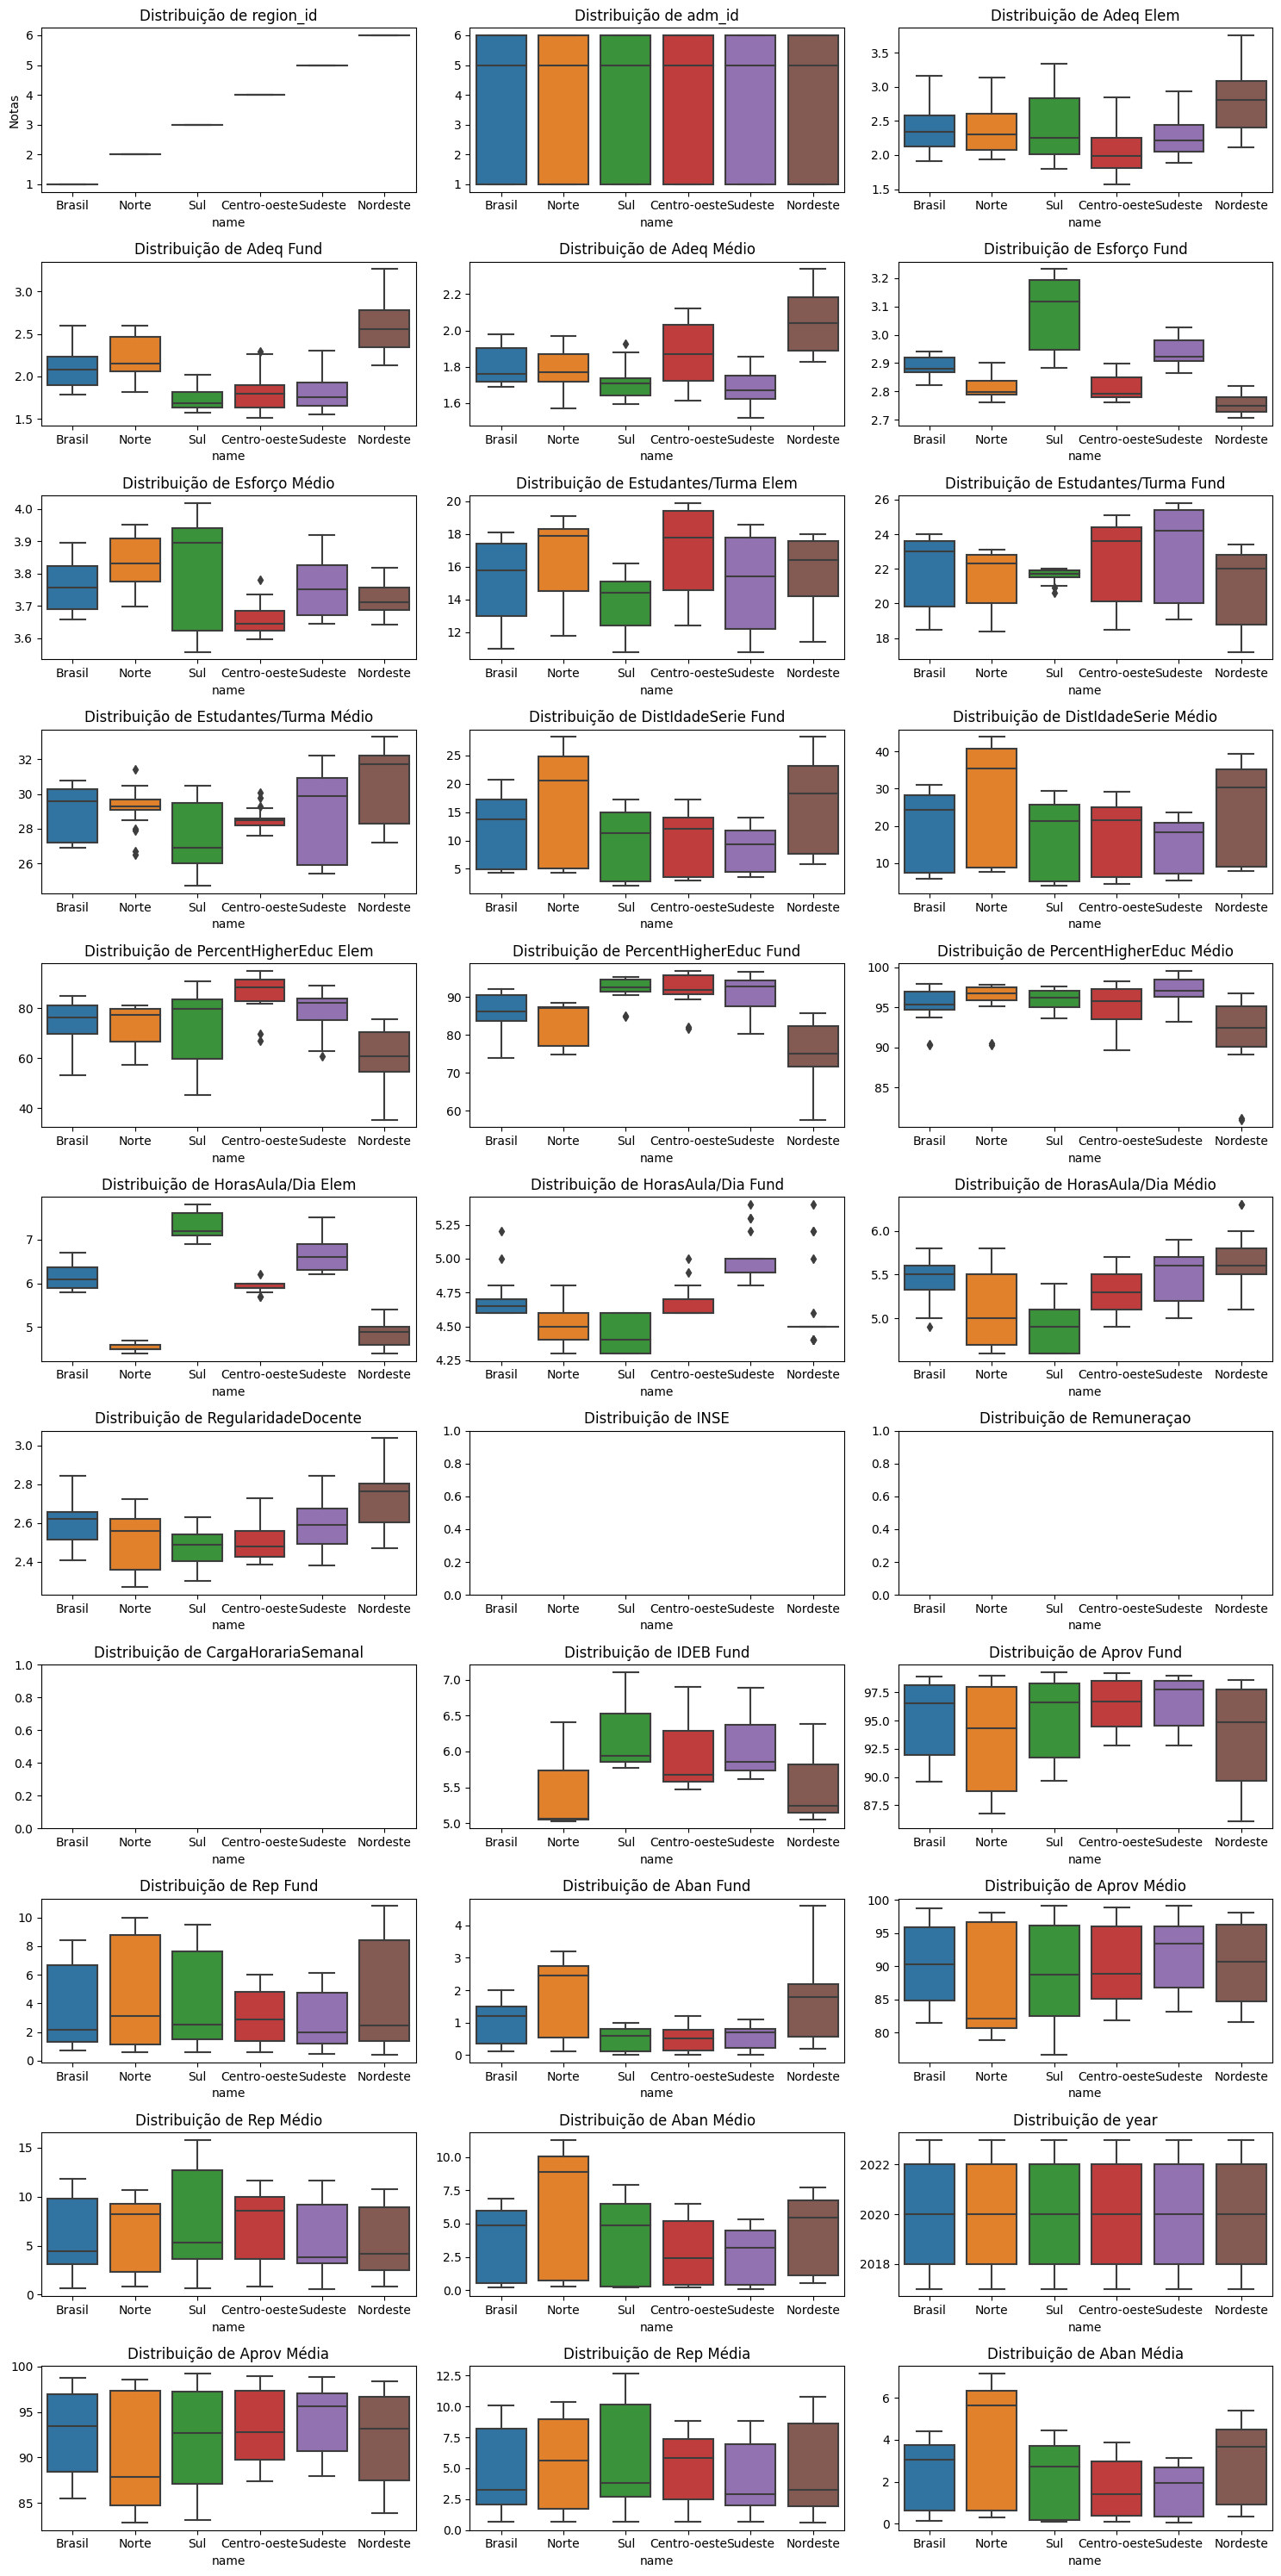

In [25]:
# Número de variáveis (colunas)
num_vars = len(educ_regions_df.select_dtypes("number").columns)

# Criando uma única figura com vários subplots
plt.figure(figsize=(15, 30))  # Ajuste o tamanho conforme necessário

for i, column in enumerate(educ_regions_df.select_dtypes("number").columns, 1):
    plt.subplot(11, int(num_vars/11), i)  # 1 linha, num_vars colunas, índice i
    sns.boxplot(data=educ_regions_df, x='name', y=column)
    plt.title(f'Distribuição de {column}')
    plt.ylabel('Notas' if i == 1 else '')  # Apenas adicionar ylabel ao primeiro gráfico para evitar repetição

plt.tight_layout()  # Ajusta automaticamente os subplots
plt.show()